In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy


In [26]:

# windows용 한글 폰트 오류 해결
from matplotlib import font_manager, rc 
font_path = "C:/Windows/Fonts/malgun.ttf" # 맑음보통체
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)
plt.rc('font', family=font_name)

In [3]:
df = pd.read_excel("./data/행복지수_모음.xlsx")

In [4]:
df.head()

,Year,Rank,Country name,Life evaluation (3-year average),Lower whisker,Upper whisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,2024,147,Afghanistan,1.364,1.301,1.427,0.649,0.0,0.155,0.0,0.075,0.135,0.348
1,2023,143,Afghanistan,1.721,1.667,1.775,0.628,0.0,0.242,0.0,0.091,0.088,0.672
2,2022,137,Afghanistan,1.859,1.795,1.923,0.645,0.0,0.087,0.0,0.093,0.059,0.976
3,2021,146,Afghanistan,2.404,2.339,2.469,0.758,0.0,0.289,0.0,0.089,0.005,1.263
4,2020,150,Afghanistan,2.523,2.449,2.596,0.370,0.0,0.126,0.0,0.122,0.010,1.895


In [5]:
df = df[[
    "Year",
    "Rank",
    "Country name",
    "Life evaluation (3-year average)",
    "Explained by: Log GDP per capita",
    "Explained by: Social support",
    "Explained by: Healthy life expectancy",
    "Explained by: Freedom to make life choices",
    "Explained by: Generosity",
    "Explained by: Perceptions of corruption",
    "Dystopia + residual"
   ]]

In [6]:
df.columns = ["연도", "순위", "나라","행복지수", "GDP", "지원", "기대수명", "자유","관용","부패인식","잔차"]
df.head()

,연도,순위,나라,행복지수,GDP,지원,기대수명,자유,관용,부패인식,잔차
0,2024,147,Afghanistan,1.364,0.649,0.0,0.155,0.0,0.075,0.135,0.348
1,2023,143,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672
2,2022,137,Afghanistan,1.859,0.645,0.0,0.087,0.0,0.093,0.059,0.976
3,2021,146,Afghanistan,2.404,0.758,0.0,0.289,0.0,0.089,0.005,1.263
4,2020,150,Afghanistan,2.523,0.370,0.0,0.126,0.0,0.122,0.010,1.895


In [7]:
#df[df["나라"] == "Canada"]

In [8]:
# 2019 ~ 2024
country_list = [
                "Republic of Korea",
                "Finland",
                "Denmark",
                "Iceland",
                "Israel",
                "New Zealand",
                "Canada",
               ]
df = df[(df["연도"].isin(np.arange(2019,2025)))&df["나라"].isin(country_list)]
df.head()

,연도,순위,나라,행복지수,GDP,지원,기대수명,자유,관용,부패인식,잔차
294,2024,18,Canada,6.803,1.749,1.647,0.832,0.813,0.168,0.323,1.271
295,2023,15,Canada,6.900,1.840,1.459,0.701,0.730,0.230,0.368,1.572
296,2022,13,Canada,6.961,1.881,1.484,0.541,0.656,0.218,0.364,1.815
297,2021,15,Canada,7.025,1.886,1.188,0.783,0.659,0.217,0.368,1.924
298,2020,15,Canada,7.103,1.447,1.044,0.798,0.648,0.246,0.335,2.585


# 결측치를 위한 전처리

## 나라별로 비율을 알아보자

In [9]:
korea_df = df[(df["나라"] == "Republic of Korea")].dropna(axis=0)
korea_df

,연도,순위,나라,행복지수,GDP,지원,기대수명,자유,관용,부패인식,잔차
1438,2024,58,Republic of Korea,6.0380,1.709000,1.357000,0.903000,0.678000,0.100000,0.139000,1.152000
1439,2023,52,Republic of Korea,6.0580,1.815000,1.178000,0.770000,0.555000,0.126000,0.158000,1.456000
1440,2022,57,Republic of Korea,5.9510,1.853000,1.188000,0.603000,0.446000,0.112000,0.163000,1.587000
1441,2021,59,Republic of Korea,5.9350,1.851000,0.886000,0.841000,0.414000,0.111000,0.176000,1.656000
1442,2020,63,Republic of Korea,5.8450,1.403000,0.758000,0.801000,0.353000,0.134000,0.135000,2.262000
1443,2019,61,Republic of Korea,5.8724,1.245301,1.133561,1.022543,0.259356,0.170304,0.094596,1.946757


In [10]:
x = df[['GDP', '지원', '기대수명', '자유', '관용', '부패인식', '잔차']]
y =  df["행복지수"]

model=LinearRegression()
result=model.fit(x,y)
결정계수=model.score(x,y) 
회귀계수=model.coef_ # x 가 1 올라갈때 y 의 변화량 (가중치)
절편 = model.intercept_

In [11]:
print(result)
print(결정계수)
print(회귀계수)
print(절편)

LinearRegression()
0.9999990480264084
[0.99804986 1.00073393 0.99722975 1.00007045 0.99996372 1.00003979
 0.99971328]
0.004831689363816061


In [12]:
회귀계수.sum() + 절편

np.float64(7.000632483685173)

In [13]:
clena_df = df.dropna(axis=0)
clena_df.head(10)

,연도,순위,나라,행복지수,GDP,지원,기대수명,자유,관용,부패인식,잔차
294,2024,18,Canada,6.8030,1.749000,1.647000,0.832000,0.813000,0.168000,0.323000,1.271000
295,2023,15,Canada,6.9000,1.840000,1.459000,0.701000,0.730000,0.230000,0.368000,1.572000
296,2022,13,Canada,6.9610,1.881000,1.484000,0.541000,0.656000,0.218000,0.364000,1.815000
297,2021,15,Canada,7.0250,1.886000,1.188000,0.783000,0.659000,0.217000,0.368000,1.924000
298,2020,15,Canada,7.1030,1.447000,1.044000,0.798000,0.648000,0.246000,0.335000,2.585000
299,2019,11,Canada,7.2321,1.301648,1.435392,1.022502,0.644028,0.281529,0.351702,2.195269
455,2024,2,Denmark,7.5210,1.825000,1.748000,0.820000,0.955000,0.150000,0.488000,1.535000
456,2023,2,Denmark,7.5830,1.908000,1.520000,0.699000,0.823000,0.204000,0.548000,1.881000
457,2022,2,Denmark,7.5860,1.949000,1.548000,0.537000,0.734000,0.208000,0.525000,2.084000
458,2021,2,Denmark,7.6360,1.953000,1.243000,0.777000,0.719000,0.188000,0.532000,2.226000


In [14]:
clena_df.groupby("나라")[['GDP', '지원', '기대수명', '자유', '관용', '부패인식', '잔차']].mean()

,GDP,지원,기대수명,자유,관용,부패인식,잔차
나라,,,,,,,
Canada,1.684108,1.376232,0.779584,0.691671,0.226755,0.351617,1.893712
Denmark,1.743991,1.445075,0.762555,0.763673,0.200132,0.512210,2.171123
Finland,1.684032,1.467254,0.755212,0.784386,0.128445,0.512643,2.460139
Iceland,1.725084,1.519428,0.787641,0.767663,0.272388,0.174590,2.284448
Israel,1.624911,1.412543,0.792509,0.574617,0.175144,0.150983,2.552393
New Zealand,1.640720,1.433203,0.757690,0.711798,0.244954,0.461545,1.897185
Republic of Korea,1.646050,1.083427,0.823424,0.450893,0.125551,0.144266,1.676626


In [30]:
# import matplotlib.font_manager as fm

# # 설치된 폰트 출력
# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1766: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  f.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1766: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) Arial.
  f.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) miss

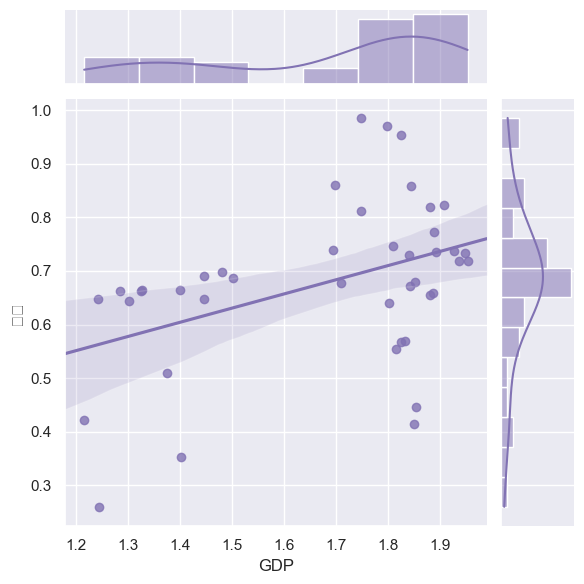

In [33]:
# 1인당 GDP 와 기대수명과의 상관관계 

plt.rcParams['font.family'] = 'Nanum Brush Script'
# x = 년도
# y = g

sns.set_theme(style="darkgrid")

g = sns.jointplot(
    x="GDP", 
    y="자유", 
    data=clena_df,
    kind="reg", 
    truncate=False,
    color="m"
)